### 1.Importing the dependencies

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2.Reading the data

In [2]:
Airline_data = pd.read_csv("Airline_satisfication_data.csv")
Airline_data.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,types_of_travel,Class,Flight_Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 3.Getting some information about the datset

In [3]:
#getting no of rows and columns present in the dataset
Airline_data.shape

(103904, 25)

In [4]:
#dropping unnecessary columns
Airline_data=Airline_data.drop("Unnamed: 0",axis=1)
Airline_data=Airline_data.drop("id",axis=1)

In [5]:
#columns present in the dataset
columns = Airline_data.columns
print(columns)

Index(['Gender', 'Customer_Type', 'Age', 'types_of_travel', 'Class',
       'Flight_Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease_of_Online_booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


### Categorical features

In [6]:
Categorical_features = [feature for feature in Airline_data.columns if Airline_data[feature].dtype=='O']
Categorical_features

['Gender', 'Customer_Type', 'types_of_travel', 'Class', 'satisfaction']

In [7]:
for feature in Categorical_features:
    print(feature,Airline_data[feature].unique())

Gender ['Male' 'Female']
Customer_Type ['Loyal Customer' 'disloyal Customer']
types_of_travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']
satisfaction ['neutral or dissatisfied' 'satisfied']


### Numerical features

In [8]:
Numerical_features = [feature for feature in Airline_data.columns if Airline_data[feature].dtype!='O']
Numerical_features

['Age',
 'Flight_Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease_of_Online_booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

### Discreate features

In [9]:
discreate_features = [feature for feature in Numerical_features if len(Airline_data[feature].unique())<25]
discreate_features

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease_of_Online_booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

### Continuous Features

In [10]:
continuous_features = [feature for feature in Numerical_features if feature not in discreate_features]
continuous_features

['Age',
 'Flight_Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

### Univariate Analysis
    "uni" means one and "variate" means variable,there is only one dependable variable

### BarCharts

   The bar graph is very convenient while comparing categories of data or different groups of data.

<Figure size 576x360 with 0 Axes>

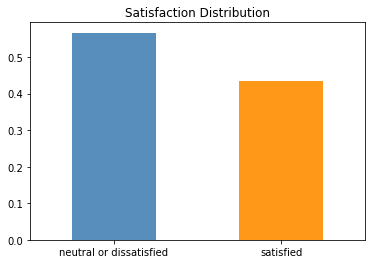

In [11]:
fig = plt.figure(figsize = (8,5))
fig, ax = plt.subplots()
Airline_data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['steelblue', 'darkorange'], alpha = 0.9, rot=0)
x_labels = ['neutral or dissatisfied', 'satisfied']
ax.set_xticklabels(x_labels)
plt.title('Satisfaction Distribution')
plt.show()

<Figure size 576x360 with 0 Axes>

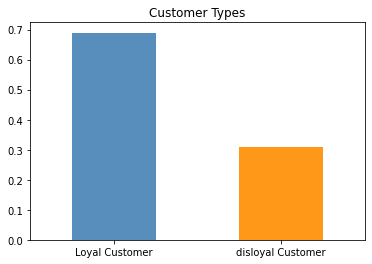

In [16]:
fig = plt.figure(figsize = (8,5))
fig, ax = plt.subplots()
Airline_data.types_of_travel.value_counts(normalize = True).plot(kind='bar', color= ['steelblue', 'darkorange'], alpha = 0.9, rot=0)
x_labels = ['Loyal Customer', 'disloyal Customer']
ax.set_xticklabels(x_labels)
plt.title('Customer Types')
plt.show()

<Figure size 576x360 with 0 Axes>

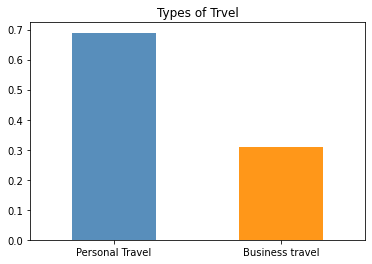

In [21]:
fig = plt.figure(figsize = (8,5))
fig, ax = plt.subplots()
Airline_data.types_of_travel.value_counts(normalize = True).plot(kind='bar', color= ['steelblue', 'darkorange'], alpha = 0.9, rot=0)
x_labels = ['Personal Travel', 'Business travel']
ax.set_xticklabels(x_labels)
plt.title('Types of Trvel')
plt.show()

<Figure size 576x360 with 0 Axes>

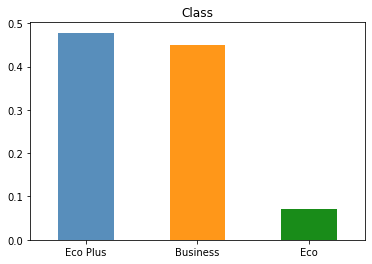

In [20]:
fig = plt.figure(figsize = (8,5))
fig, ax = plt.subplots()
Airline_data.Class.value_counts(normalize = True).plot(kind='bar', color= ['steelblue', 'darkorange','green'], alpha = 0.9, rot=0)
x_labels = ['Eco Plus','Business','Eco']
ax.set_xticklabels(x_labels)
plt.title('Class')
plt.show()

### Conclusion

Satisfaction Distribution - More number of pepole Neutral or disatisfied with the service,it's almost 55% & 45%of people satisfied with the Service

Customer Types: More number of people are Loyal customer it is almost 69%& 31 & people are Disloyal customer

Types of Trvel: More number of people are prefered personal Trvel and it is almost 69%& 31 & people are prefered Business Trvel

class: More number of people prefered Business class &Eco PLus with percentage of 47&46 and 7 percentage of people prefered Eco which is low when compared to other two

